# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [148]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [150]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [151]:
# Extract the HTML
html = browser.html
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [152]:
# Find the table
table = soup.find('table', class_='table')

# Extract all rows of data
table_rows = table.find_all('tr', class_='data-row')
table_rows


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [153]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    # Extract all data cells in the row
    data_cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in data_cells]
    data.append(row_data)

print(data)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [154]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temperature_df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [155]:
# Confirm DataFrame was created successfully
mars_temperature_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [156]:
# Read in HTML tables into a DataFrame
df = pd.read_html(url)
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [157]:
# Examine data type of each column
mars_temperature_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [158]:
# Change data types for data analysis
# Convert terrestrial_date to datetime64[ns]
mars_temperature_df["terrestrial_date"] = mars_temperature_df["terrestrial_date"].astype("datetime64[ns]")
mars_temperature_df["sol"] = mars_temperature_df["sol"].astype("int32")
mars_temperature_df["ls"] = mars_temperature_df["ls"].astype("int32")
mars_temperature_df["month"] = mars_temperature_df["month"].astype("int32")
mars_temperature_df["min_temp"] = mars_temperature_df["min_temp"].astype("float64")
mars_temperature_df["pressure"] = mars_temperature_df["pressure"].astype("float64")

In [159]:
# Confirm type changes were successful by examining data types again
mars_temperature_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [160]:
# 1. How many months are there on Mars?
unique_months = mars_temperature_df['month'].nunique()
print(f"There are {unique_months} months on Mars")

There are 12 months on Mars


In [161]:
# 2. How many sols (Martian days) worth of data are there?
worth_data_sols = mars_temperature_df['sol'].count()
print(f"There are {worth_data_sols} sols (Martian days) worth of data")

There are 1867 sols (Martian days) worth of data


In [162]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_temperature_df.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [163]:
average_min_temp.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: min_temp
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


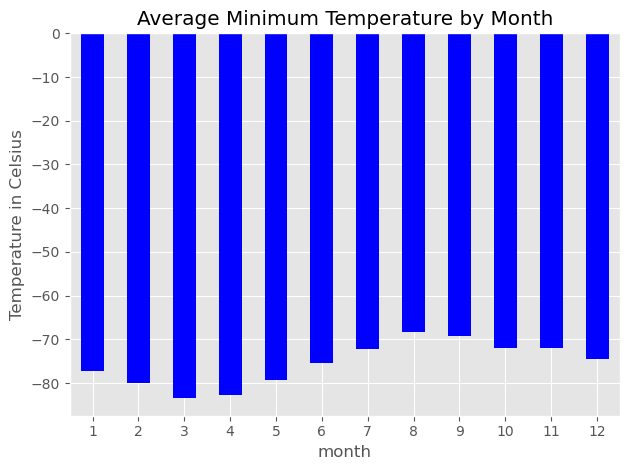

In [164]:
# Plot the average minimum temperature by month
# Use Pandas Plotting with Matplotlib to plot the data
plot_min_temp = average_min_temp.plot(kind='bar', color='blue')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

# Set x-ticks, y-ticks
plt.xticks(range(len(average_min_temp)),average_min_temp.index,rotation=0)
plt.yticks(range(0, int(average_min_temp.min()), -10))

# Set x limit
plt.xlim(-0.5, len(average_min_temp) - 0.5)

# Apply a ggplot style to the plot
plt.style.use('ggplot')

# Adjust layout for a tight fit
plt.tight_layout()

# Show the plot
plt.show()

In [165]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
average_min_temp_sort = average_min_temp.sort_values(ascending=True)
average_min_temp_sort

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [166]:
# Get average min temperature ordering from coldest to warmest
average_min_temp_sort_df = pd.DataFrame(average_min_temp_sort)
average_min_temp_sort_df

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


/var/folders/24/7rhj3_jn39lg7m0d74t2dp5w0000gn/T/ipykernel_88753/3489358965.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.yticks(range(0, int(average_min_temp_sort_df.min()), -10))


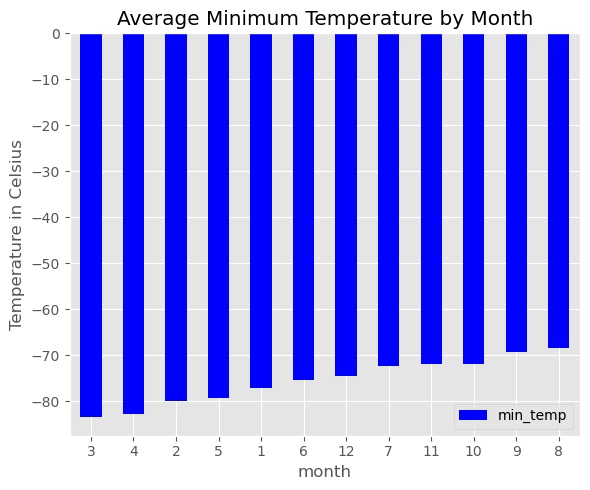

In [167]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_average_min_temp_sort_df = average_min_temp_sort_df.plot(kind='bar', color='blue', figsize=(6,5))
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

# Set x-ticks, y-ticks
plt.xticks(range(len(average_min_temp_sort_df)),average_min_temp_sort_df.index,rotation=0)
plt.yticks(range(0, int(average_min_temp_sort_df.min()), -10))

# Set x limit
plt.xlim(-0.5, len(average_min_temp_sort_df) - 0.5)

# Apply a ggplot style to the plot
plt.style.use('ggplot')

# Adjust layout for a tight fit
plt.tight_layout()

# Show the plot
plt.show()

In [168]:
# 4. What is the average pressure by month?
average_pressure = mars_temperature_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [169]:
average_pressure.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: pressure
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


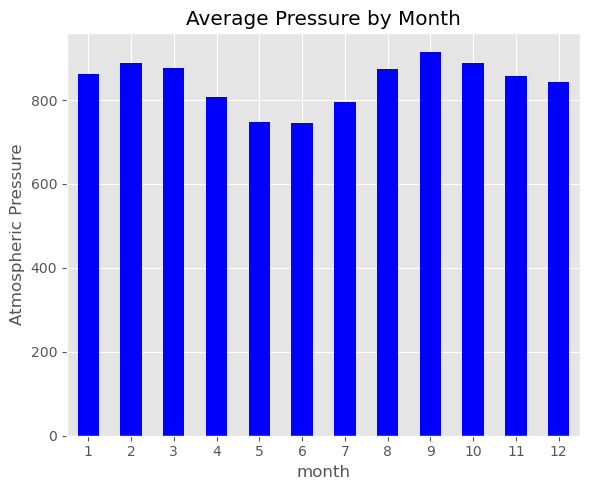

In [170]:
# Plot the average minimum temperature by month
# Use Pandas Plotting with Matplotlib to plot the data
plot_average_pressure = average_pressure.plot(kind='bar', color='blue', figsize=(6, 5))
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

# Set x-ticks, y-ticks
plt.xticks(range(len(average_pressure)),average_pressure.index,rotation=0)
plt.yticks(range(0, int(average_pressure.max()), 200))

# Set x limit
plt.xlim(-0.5, len(average_pressure) - 0.5)

# Apply a ggplot style to the plot
plt.style.use('ggplot')

# Adjust layout for a tight fit
plt.tight_layout()

# Show the plot
plt.show()

In [171]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
average_pressure_sort = average_pressure.sort_values(ascending=True)

# Convert to DataFrame
average_pressure_sort_df = pd.DataFrame(average_pressure_sort)
average_pressure_sort_df

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


/var/folders/24/7rhj3_jn39lg7m0d74t2dp5w0000gn/T/ipykernel_88753/2398305161.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.yticks(range(0, int(average_pressure_sort_df.max()), 200))


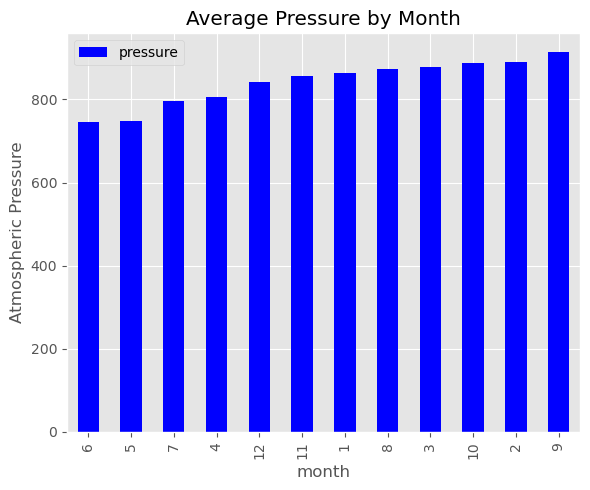

In [172]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_average_pressure_sort_df = average_pressure_sort_df.plot(kind = "bar", color = "blue", figsize = (6, 5))

plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")

#Set xticks, yticks
plt.xticks(range(len(average_pressure_sort_df)), average_pressure_sort_df.index, rotation = 90)
plt.yticks(range(0, int(average_pressure_sort_df.max()), 200))

# Set x limit
plt.xlim(-0.5, len(average_pressure_sort_df) -0.5)

# Adjust layout for a tight fit
plt.tight_layout()

# Apply a ggplot style to the plot
plt.style.use('ggplot')

# Print plot
plt.show()


In [173]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Since the orbital period of Mars is 687 Earth days, so one Martian year is equal to 687 Earth days.
earth_days_per_one_Martian_year = 687

# Number of Martian years in the dataset:
number_of_Martian_year = mars_temperature_df['terrestrial_date'].nunique() / earth_days_per_one_Martian_year

print(f"""There are {earth_days_per_one_Martian_year} earth days in a Martian year
The dataset show the observation was in {number_of_Martian_year:.2f} Martian years
      """)

There are 687 earth days in a Martian year
The dataset show the observation was in 2.72 Martian years
      


     terrestrial_date  min_temp
0          2012-08-16     -75.0
1          2012-08-17     -76.0
2          2012-08-18     -76.0
3          2012-08-19     -74.0
4          2012-08-20     -74.0
...               ...       ...
1862       2018-02-23     -78.0
1863       2018-02-24     -77.0
1864       2018-02-25     -76.0
1865       2018-02-26     -77.0
1866       2018-02-27     -77.0

[1867 rows x 2 columns]


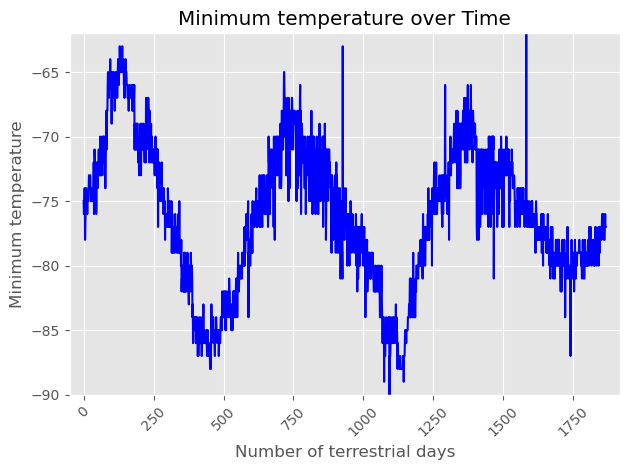

In [174]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_terrestrial_temp_df = mars_temperature_df[["terrestrial_date", "min_temp"]]
print(mars_terrestrial_temp_df)

plot_mars_terrestrial_temp_df = plt.plot(range(len(mars_temperature_df['terrestrial_date'])), mars_terrestrial_temp_df["min_temp"], color ="blue")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.title("Minimum temperature over Time")

# Apply xticks and xtick labels
plt.xticks(range(0, len(mars_temperature_df['terrestrial_date']), 250),rotation=45)

plt.yticks(range(int(mars_terrestrial_temp_df['min_temp'].min()) - 10, int(mars_terrestrial_temp_df['min_temp'].max()) + 10, 5))

# Set x limit and y limit

plt.xlim(-50, len(mars_terrestrial_temp_df) + 50)
plt.ylim(int(mars_terrestrial_temp_df['min_temp'].min()), int(mars_terrestrial_temp_df['min_temp'].max()))

# Set plot tight
plt.tight_layout()

# Apply a ggplot style to the plot
plt.style.use('ggplot')

# Show plot
plt.show()



In [175]:
# Get the coldest month
coldest_month = average_min_temp_sort_df.iloc[0]
print(f"The coldest month: {coldest_month.name}")

# Get the warmest month
warmest_month = average_min_temp_sort_df.iloc[-1]
print(f"""The coldest month: {warmest_month.name}
      """)

# Get the information of lowest min temperature
lowest_temperature_row = mars_temperature_df.loc[mars_temperature_df["min_temp"] == mars_temperature_df["min_temp"].min()]
print(f""" Lowest temperature date: 
{lowest_temperature_row}
                """)

# Get the information of highest min temperature
highest_temperature_row = mars_temperature_df.loc[mars_temperature_df["min_temp"] == mars_temperature_df["min_temp"].max()]
print(f""" Highest temperature date: 
{highest_temperature_row}
          """)




The coldest month: 3
The coldest month: 8
      
 Lowest temperature date: 
        id terrestrial_date   sol  ls  month  min_temp  pressure
1093  1119       2015-12-09  1188  79      3     -90.0     881.0
                
 Highest temperature date: 
        id terrestrial_date   sol  ls  month  min_temp  pressure
1582  1614       2017-05-10  1692   2      1     -62.0     820.0
          


#### Minimum Temperature

Summary of Findings:
- Coldest Temperature:
    The lowest recorded temperature on Mars from the dataset was -90°C on 9th December 2015.
- Warmest Temperature:
    The highest recorded temperature was -62°C on 10th May 2017.
-  Monthly Average Minimum Temperature:
    The coldest month on average was March, with an average minimum temperature of -83.31°C.
    The warmest month on average was August, with an average minimum temperature of -68.38°C.

Breakdown of the Monthly Average Minimum Temperatures:
    March: -83.31°C (coldest month)
    April: -82.75°C
    February: -79.93°C
    May: -79.31°C
    January: -77.16°C
    June: -75.30°C
    December: -74.45°C
    July: -72.28°C
    November: -71.99°C
    October: -71.98°C
    September: -69.17°C
    August: -68.38°C (warmest month)

Explanation:
- Mars is extremely cold: Based on the observed minimum temperatures, Mars stays well below the freezing point of water (0°C) for the majority of the time.
- The coldest month (March) and the warmest month (August) on Mars show a seasonal temperature fluctuation, with a maximum difference of around 15°C. The temperature ranges of the months spans from approximately -83°C in March to -68°C in August, which indicates a significant variation in temperature across the Martian year.
- The coldest month being March and the warmest month being August shows a seasonality effect on Mars, although the difference in temperature is relatively modest when compared to Earth.

Conclusion:
This analysis provides a clearer picture of the extreme cold that dominates the Martian climate. Mars is consistently colder than Earth, with temperatures well below freezing throughout the Martian year.

In [176]:
# Get the coldest month
lowest_pressure_month = average_pressure_sort_df.iloc[0]
print(f"The lowest pressure month: {lowest_pressure_month.name}")

# Get the warmest month
highest_pressure_month = average_pressure_sort_df.iloc[-1]
print(f"""The highest pressure month: {highest_pressure_month.name}
      """)

# Get the information of lowest pressure
lowest_pressure_row = mars_temperature_df.loc[mars_temperature_df["pressure"] == mars_temperature_df["pressure"].min()]
print(f""" Lowest pressure: 
{lowest_pressure_row}
                """)

# Get the information of highest pressure
highest_pressure_row = mars_temperature_df.loc[mars_temperature_df["pressure"] == mars_temperature_df["pressure"].max()]
print(f""" Highest pressure: 
{highest_pressure_row}
          """)

The lowest pressure month: 6
The highest pressure month: 9
      
 Lowest pressure: 
        id terrestrial_date   sol   ls  month  min_temp  pressure
1866  1895       2018-02-27  1977  135      5     -77.0     727.0
                
 Highest pressure: 
      id terrestrial_date  sol   ls  month  min_temp  pressure
156   80       2013-01-27  170  252      9     -66.0     925.0
157   81       2013-01-28  171  253      9     -67.0     925.0
766  785       2014-12-23  846  257      9     -74.0     925.0
          


#### Atmospheric Pressure

Summary of Findings:
- Lowest Pressure:
    The lowest recorded pressure on Mars from the dataset was 727 hPa on 27th February 2018.
- Highest Pressure:
    The highest recorded pressure was 925 hPa on 27th and 28th January 2013, 23th December 2014.
- Monthly Average Pressure:
    The lowest month on average was June, with an average pressure of 745.054422 hPa.
    The highest month on average was September, with an average pressure of 919.305970 hPa.

Breakdown of the Monthly Average Pressure:
    June	    745.054422 hPa (lowest average pressure)
    May	        748.557047 hPa
    July	    795.105634 hPa
    April	    806.329897 hPa
    December	842.156627 hPa
    November	857.014493 hPa
    January	    862.488506 hPa
    August	    873.829787 hPa
    March	    877.322917 hPa
    October	    887.312500 hPa
    February	889.455056 hPa
    September	913.305970 (highest average pressure)

Explanation:
- Mars' atmospheric pressure varies significantly throughout the year, with the lowest pressures occurring in the summer months (June) and the highest pressures observed in the fall (September). This fluctuation reflects seasonal changes on Mars.

- Pressure Variability: The pressure range spans from 727 hPa to 925 hPa, indicating a significant but not extreme change. These values are much lower than Earth's average pressure (1013 hPa), which further emphasizes the thin Martian atmosphere.

Conclusion:
This analysis highlights the seasonal variation in atmospheric pressure on Mars. Although pressure on Mars is generally low (relative to Earth), it exhibits predictable fluctuations, with the lowest monthly pressures occurring during the Martian summer and the highest during the fall. 

#### Year Length
Visual Estimation:
- We can find in the plot there are almost 3 circles. Each circle is about 600 terrestrial dates.

Check if this is within 25% of the true value
- Calculate the margin of error: 25% of 687 days is 687 * 0.25 = 171.75 days.
- Determine the acceptable range: The true value is 687 days, so the acceptable range is:
    Lower bound: 687 - 171.75 = 515.25 days
    Upper bound: 687 + 171.75 = 858.75 days
- Compare the estimate: Since 600 days is within the range of 515.25 to 858.75 days, your estimate of 600 days is within 25% of the true value (687 days).

Thus, the visual estimate is considered acceptable within the 25% margin.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [177]:
# Write the data to CSV files
average_min_temp_sort_df.to_csv("Output/average_min_temp_sort.csv", index=False, header=True)
average_pressure_sort_df.to_csv("Output/average_pressure_sort.csv", index=False, header=True)

In [178]:
browser.quit()